In [81]:
import numpy as np
import einops
import matplotlib
import matplotlib.pyplot as plt

# from scipy.spatial.distance import pdist
# from scipy.spatial import ckdtree

from shapely.geometry.polygon import Polygon
import shapely

import importlib

In [82]:
import loops
import lattice
import utils

In [83]:
loops = importlib.reload(loops)
lattice = importlib.reload(lattice)
utils = importlib.reload(utils)


In [84]:
nx = 2
ny = 3
grid_params = {'x1':0, 'x2':nx, 'y1':0, 'y2':ny, 'Nx':nx, 'Ny':ny, 
               'a1':np.array([2,0]), 'a2':np.array([1, np.sqrt(3)]), 
               'bases':[np.array([1/2, 0]), np.array([-1/2, 0]), np.array([0, np.sqrt(3)/2.])]  
                                 }
mesh = lattice.create_grid_mesh(grid_params)
BZ_kpoints = lattice.create_grid(grid_params)
my_x, my_y = zip((BZ_kpoints[:, 0], BZ_kpoints[:, 1]))

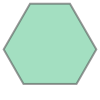

In [85]:
# Define the polygon for the cut
height = np.sqrt(3)/2
epsilon = 0.01 # to shift the boundary of the polygon slightly so that the region counts correct points within the boundary
polygon = Polygon([(3 - epsilon, 0 - epsilon), (7 + epsilon, 0 - epsilon), (8.5 + epsilon, 3 * height + epsilon), 
                   (6.5 + epsilon, 7 * height + epsilon), (3.5 - epsilon, 7 * height + epsilon), (1.5 - epsilon, 3 * height + epsilon)])
polygon

In [86]:
mesh[0].shape

(3, 2)

In [87]:
mesh[0]

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

In [88]:
mesh[1].shape

(3, 2)

In [89]:
mesh[1]

array([[0., 0.],
       [1., 1.],
       [2., 2.]])

In [90]:
BZ_kpoints

array([[ 0.5       ,  0.        ],
       [ 2.5       ,  0.        ],
       [ 1.5       ,  1.73205081],
       [ 3.5       ,  1.73205081],
       [ 2.5       ,  3.46410162],
       [ 4.5       ,  3.46410162],
       [-0.5       ,  0.        ],
       [ 1.5       ,  0.        ],
       [ 0.5       ,  1.73205081],
       [ 2.5       ,  1.73205081],
       [ 1.5       ,  3.46410162],
       [ 3.5       ,  3.46410162],
       [ 0.        ,  0.8660254 ],
       [ 2.        ,  0.8660254 ],
       [ 1.        ,  2.59807621],
       [ 3.        ,  2.59807621],
       [ 2.        ,  4.33012702],
       [ 4.        ,  4.33012702]])

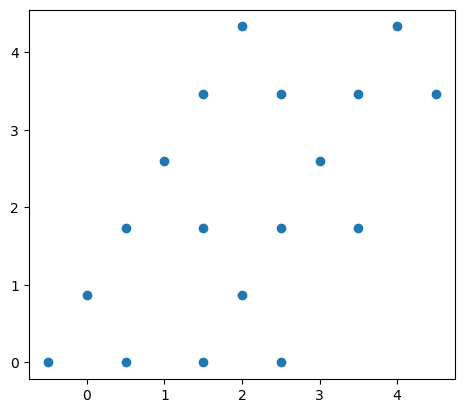

In [91]:
fig, ax = plt.subplots(1,1)
my_x, my_y = lattice.convert_to_XY(BZ_kpoints)
ax.scatter(my_x, my_y)
ax.set_aspect("equal")

In [93]:
def _find_all_bonds(pts, cut_off=1.1):
  # utility function to find all bonds given all points `pts`
  my_points = close_pairs_pdist(pts, 1.1)
  bonds = pts[np.stack(my_points).T]
  return np.around(bonds, 2)

bonds = _find_all_bonds(BZ_kpoints)
fig, ax = plt.subplots(1,1)
# my_x, my_y = zip((np.stack(BZ_kpoints_cut, 0)[:, 0], np.stack(BZ_kpoints_cut, 0)[:, 1]))
ax.scatter(my_x, my_y)
ax.set_aspect("equal")
_plot_v_bonds(ax, bonds, c='r')
fig.suptitle(f"Lattice with N={my_x[0].shape[0]} and " +r"$N_{\rm bonds}=$" + f"{bonds.shape[0]}")


NameError: name 'close_pairs_pdist' is not defined